In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


(42000, 785)
(28000, 784)


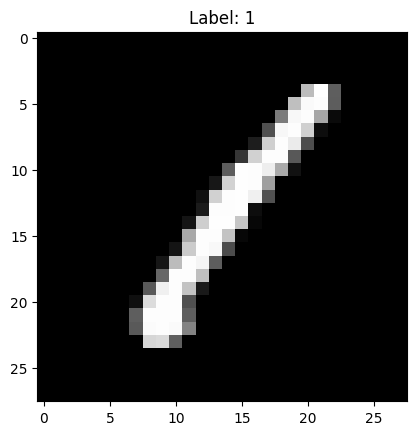

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training and test data
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Check the structure of the data
print(train_data.shape)  # 42000 rows and 785 columns (1 label + 784 pixel values)
print(test_data.shape)   # 28000 rows and 784 columns (784 pixel values)

# Separate labels from the pixel values in the training data
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

# Visualize some example digits
example_image = X_train.iloc[0].values.reshape(28,28)
plt.imshow(example_image, cmap='gray')
plt.title(f'Label: {y_train.iloc[0]}')
plt.show()


In [3]:
# Normalize the pixel values (0-255) to (0-1)
X_train = X_train / 255.0
test_data = test_data / 255.0


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the training data into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_val_pred = log_reg.predict(X_val_split)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')


Validation Accuracy: 0.9189


In [5]:
# Make predictions on the test data
test_predictions = log_reg.predict(test_data)

# Prepare the submission file
submission = pd.DataFrame({
    'ImageId': range(1, len(test_predictions) + 1),
    'Label': test_predictions
})

submission.to_csv('digit_recognizer_submission.csv', index=False)


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load the training data from the Kaggle competition dataset
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

# Separate features and labels
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

# Reshape the training data to fit the CNN input (28x28 pixels, 1 channel)
X_train = X_train.values.reshape(-1, 28, 28, 1)

# Normalize the pixel values (0-255) to the range (0-1)
X_train = X_train / 255.0

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer for 28x28 grayscale images
    layers.Conv2D(32, (3, 3), activation='relu'),  # First Conv layer with 32 filters
    layers.MaxPooling2D((2, 2)),  # First Max-Pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second Conv layer with 64 filters
    layers.MaxPooling2D((2, 2)),  # Second Max-Pooling layer
    layers.Flatten(),  # Flattening the image
    layers.Dense(64, activation='relu'),  # Fully connected layer with 64 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for digits (0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_split, y_train_split, epochs=10, validation_data=(X_val_split, y_val_split))

# Save the model
model.save('digit_recognizer_cnn.h5')

# Print final validation accuracy
val_accuracy = model.evaluate(X_val_split, y_val_split, verbose=2)
print(f'Validation Accuracy: {val_accuracy[1]:.4f}')


Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8570 - loss: 0.4571 - val_accuracy: 0.9790 - val_loss: 0.0680
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9804 - loss: 0.0636 - val_accuracy: 0.9811 - val_loss: 0.0599
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9862 - loss: 0.0446 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9904 - loss: 0.0289 - val_accuracy: 0.9861 - val_loss: 0.0424
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9923 - loss: 0.0258 - val_accuracy: 0.9874 - val_loss: 0.0416
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9941 - loss: 0.0166 - val_accuracy: 0.9879 - val_loss: 0.0399
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9877 - val_loss: 0.0428
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9965 -

In [7]:
# Load the test data
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Reshape the test data to fit the CNN input (28x28 pixels, 1 channel)
X_test = test_data.values.reshape(-1, 28, 28, 1)

# Normalize the pixel values (0-255) to the range (0-1)
X_test = X_test / 255.0

# Load the trained model (if you want to use a previously saved model)

model = tf.keras.models.load_model('digit_recognizer_cnn.h5')

# Make predictions on the test data
test_predictions = model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)  # Get the index of the highest probability

# Create the submission DataFrame
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

# Save the submission file as CSV
submission.to_csv('digit_recognizer_submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
